In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

KeyboardInterrupt: 

In [5]:
df=pd.read_csv('iris_dataset.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
y = df.iloc[0:100].species.values
#convert the species names into 1 and -1 to be the label.

y = np.where(y == 'setosa', -1, 1)

# obtain the features.
X = df[['sepal_length','sepal_width']].iloc[:100].values



In [8]:
class Perceptron(object):
    #eta correspond to the update rule.
    def __init__(self, eta = .5, epochs = 50):
        #assign these attributes to the given instances self. 
        # eta is correspoding to the update rule 1/2.
        self.eta = eta #assgn attribute to the instance self 
        self.epochs = epochs 
    # train method.
    def train (self, X, y): #pass in X and y (feature and label)
        #at the instances when calling the train method on an object, assign weights. Making it a random column vector 
        self.w_ = np.random.rand(1 + X.shape[1]) 
        # a list that contain the wrong classfication that we get
        self.errors_ = []

        #update rule 
        for _ in range(self.epochs):
            errors = 0
            #for each epoch
            #zip collect the data and labels into tuples 
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi 
                self.w_[-1] -= update
                errors += int (update != 0)
            self.errors_.append(errors)

        return self
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0,1, -1)
    

In [9]:
percep = Perceptron(epochs=1_000)
percep.train(X, y)

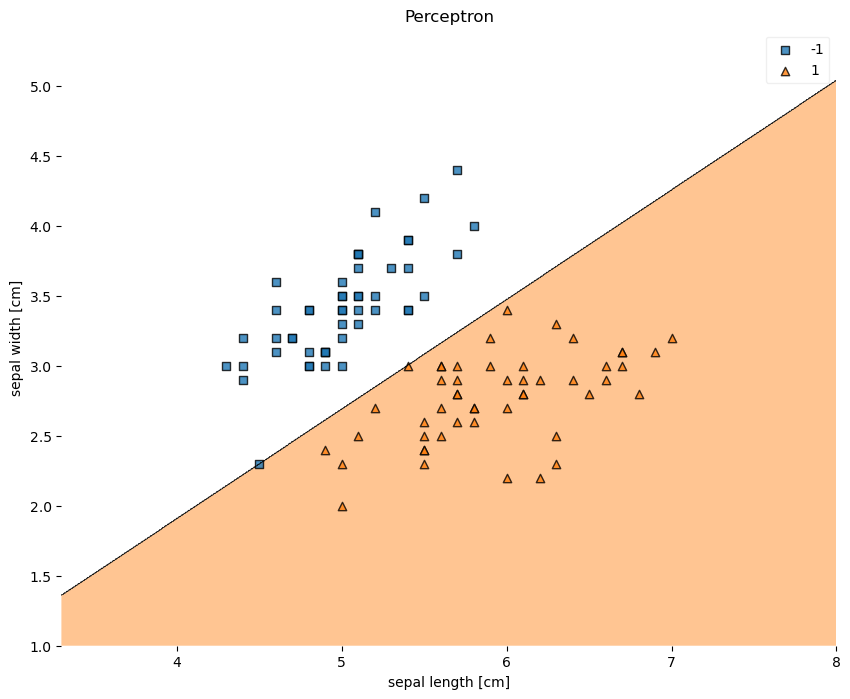

In [10]:
plt.figure(figsize= (10, 8))
plot_decision_regions (X, y, clf=percep)
plt.title("Perceptron")
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]")
plt.show()

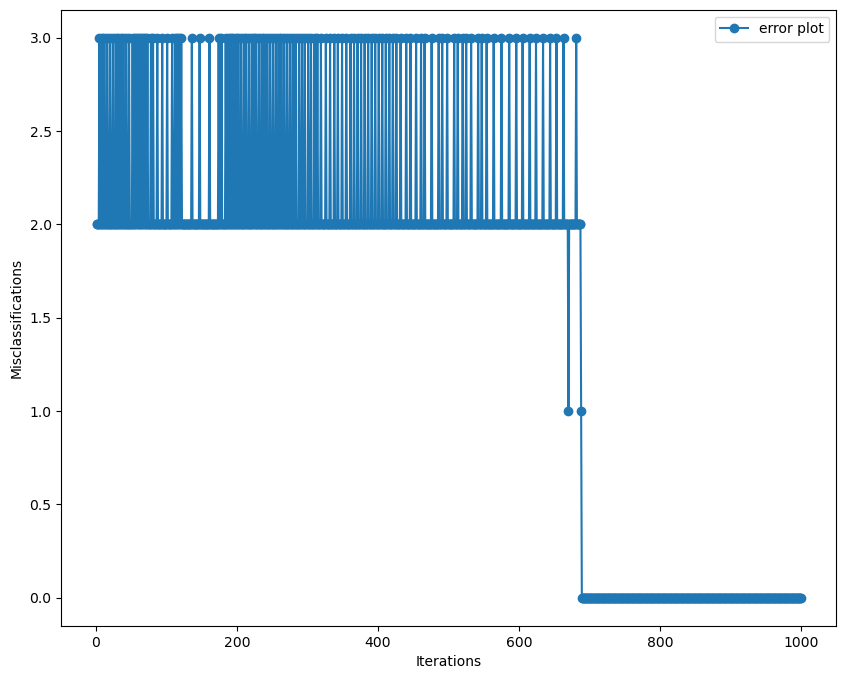

In [28]:
#ploting errors
plt.figure(figsize=(10,8))
plt.plot(range(1,len(percep.errors_)+1), percep.errors_,
        marker = "o",
        label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.legend()
plt.show()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
